In [181]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

In [154]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

datasets = [train_df, test_df]

In [155]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

datasets = [train_df, test_df]

In [156]:
for dataset in datasets:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [157]:
for dataset in datasets:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [158]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in datasets:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [159]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)

datasets = [train_df, test_df]


In [160]:
for dataset in datasets:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    dataset['Fare'] = dataset['Fare'].fillna(0)

In [161]:
guess_ages = np.zeros((2,3))
for dataset in datasets:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [162]:
for dataset in datasets:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [163]:
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [164]:
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [165]:
for dataset in datasets:
    dataset['Fare*Class'] = dataset.Fare * dataset.Pclass

In [166]:
for dataset in datasets:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [167]:
for dataset in datasets:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [168]:
for dataset in datasets:
    dataset.loc[ dataset['Fare*Class'] <= 10, 'Fare*Class'] = 0
    dataset.loc[(dataset['Fare*Class'] > 10) & (dataset['Fare*Class'] <= 25), 'Fare*Class'] = 1
    dataset.loc[(dataset['Fare*Class'] > 25) & (dataset['Fare*Class'] <= 40), 'Fare*Class']   = 2
    dataset.loc[ dataset['Fare*Class'] > 40, 'Fare*Class'] = 3
    dataset['Fare*Class'] = dataset['Fare*Class'].astype(int)

In [169]:
datasets[0].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare*Class,Age*Class
0,0,3,0,1,1,0,0,0,1,1,3
1,1,1,1,2,1,0,3,1,3,3,2
2,1,3,1,1,0,0,1,0,2,1,3
3,1,1,1,2,1,0,3,0,3,3,2
4,0,3,0,2,0,0,1,0,1,1,6
5,0,3,0,1,0,0,1,2,1,2,3
6,0,1,0,3,0,0,3,0,1,3,3
7,0,3,0,0,3,1,2,0,4,3,0
8,1,3,1,1,0,2,1,0,3,2,3
9,1,2,1,0,1,0,2,1,3,3,0


Training the Decision Tree

In [170]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

X_test  = test_df.copy()

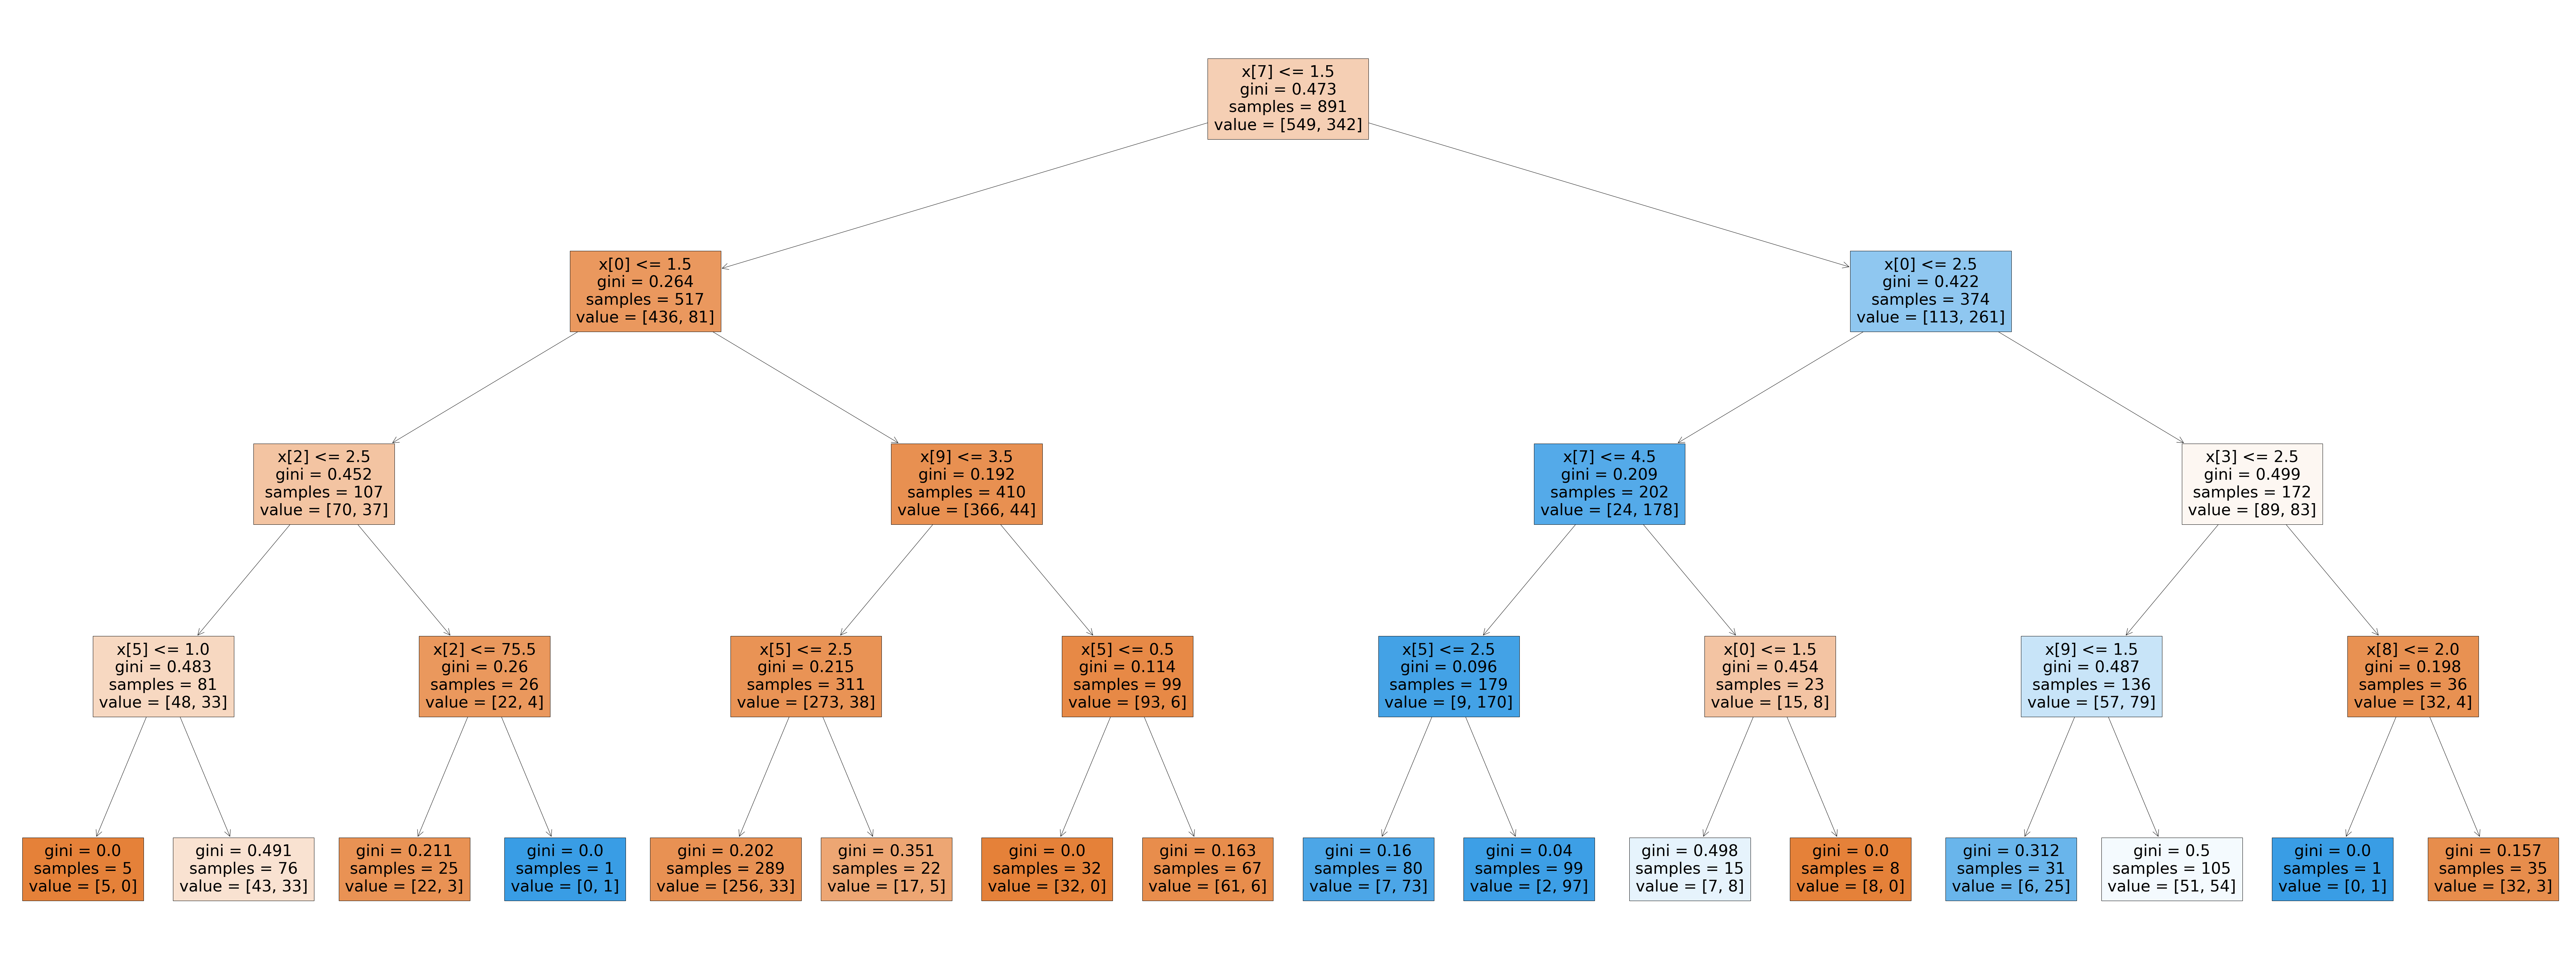

In [195]:
decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

fig = plt.figure(figsize=(130,50))
plot = plot_tree(decision_tree, filled=True)

In [196]:
acc_decision_tree

82.49

In [197]:
dt_avg = cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring='accuracy').mean()

print("Decision Tree Average:", dt_avg)

Decision Tree Average: 0.8081036971941498


In [214]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

83.61

In [215]:
rf_avg = cross_val_score(random_forest, X_train, Y_train, cv=5, scoring='accuracy').mean()

print("Random Forest Average:", rf_avg)

Random Forest Average: 0.8204193082669011
